In [29]:
import cv2 as cv
import numpy as numpy
import matplotlib.pyplot as plt

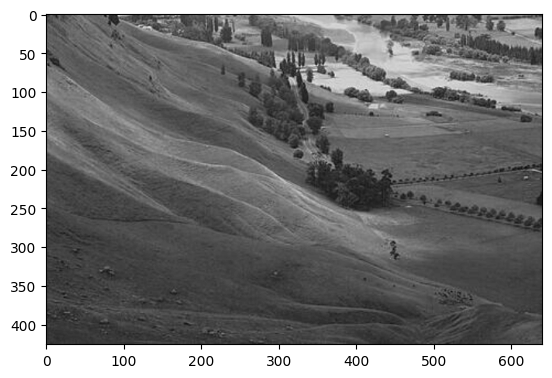

In [30]:
image = cv.imread("furina/Unequalized_Hawkes_Bay_NZ.jpg", cv.IMREAD_GRAYSCALE)
image = cv.resize(image, (640, int(image.shape[0] * (640 / image.shape[1]))))

plt.imshow(image, cmap='grey')

In [31]:
image.shape # 816 rows and 1006 columns matrix

(426, 640)

In [32]:
# Create a dictionary with key values from [0, 255] represent the color range. Count each pixels and add 1 to dict[key]
histogram = {}
count_row = 0
for row in image:
    for pixel in row:
        if pixel in histogram:
            histogram[pixel] += 1
        else:
            histogram[pixel] = 1


print(histogram)

{150: 6973, 146: 7372, 142: 8296, 144: 7431, 139: 10314, 134: 7655, 130: 3282, 132: 5185, 137: 11315, 127: 1561, 128: 1991, 151: 6888, 135: 8938, 136: 10496, 138: 11628, 140: 9538, 147: 7407, 149: 6958, 152: 6847, 158: 4279, 153: 6730, 156: 5197, 159: 3988, 161: 3467, 163: 3052, 167: 1830, 131: 4216, 148: 7228, 155: 5438, 154: 5948, 157: 4557, 160: 3601, 162: 3221, 123: 675, 129: 2486, 133: 6258, 165: 2257, 180: 537, 185: 533, 188: 581, 193: 588, 200: 211, 204: 33, 205: 19, 209: 4, 210: 6, 201: 113, 202: 65, 214: 2, 218: 1, 166: 2079, 174: 990, 143: 7692, 145: 7453, 141: 8915, 170: 1443, 169: 1547, 171: 1411, 177: 752, 178: 610, 172: 1304, 168: 1766, 175: 977, 192: 528, 164: 2596, 190: 533, 176: 869, 179: 543, 182: 472, 173: 1174, 181: 479, 186: 527, 191: 503, 198: 549, 199: 373, 197: 761, 195: 638, 194: 594, 189: 585, 183: 488, 184: 489, 187: 614, 196: 769, 126: 1274, 121: 312, 124: 825, 119: 84, 215: 2, 208: 8, 122: 458, 109: 2, 114: 7, 118: 67, 120: 168, 203: 49, 125: 1036, 207: 12,

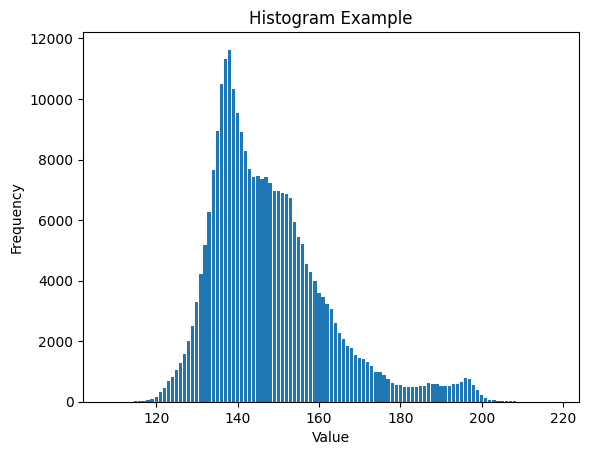

In [33]:
color_range = list(histogram.keys())
frequencies = list(histogram.values())

plt.bar(color_range, frequencies)

# Add title and labels
plt.title('Histogram Example')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Show plot
plt.show()

### Histogram using OpenCV Library 

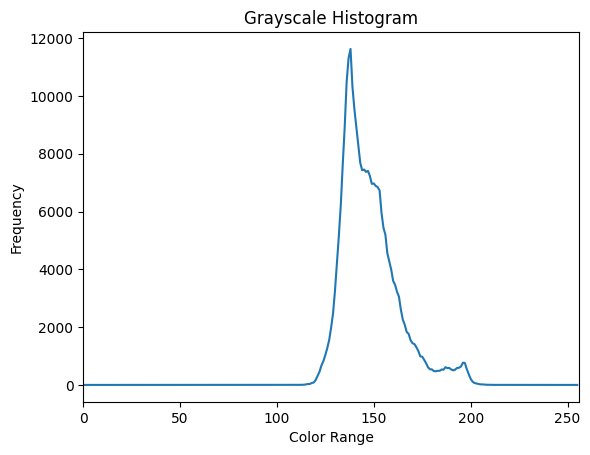

In [34]:
# [0, 256] range to avoid 255 would be exclude
hist = cv.calcHist([image], [0], None, [256], [0, 256]) 

plt.figure()
plt.title('Grayscale Histogram')
plt.xlabel('Color Range')
plt.ylabel('Frequency')
plt.plot(hist)
plt.xlim([0, 256])
plt.show()

### Histogram Equalization using `cv::equalizeHist` from OpenCV library 

In [35]:
# Create a dictionary with key values from [0, 255] represent the color range. Count each pixels and add 1 to dict[key]
def image_to_histogram(image, bins=256):
    histogram = {}
    
    # initialize color_range to histogram
    for i in range(bins):
        histogram[i] = 0
    
    for row in image:
        for pixel in row:
            if pixel in histogram:
                histogram[pixel] += 1

    sorted_histogram = {key: histogram[key] for key in sorted(histogram)}
    return sorted_histogram


histogram1 = image_to_histogram(image)

print(histogram1)

{0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0, 13: 0, 14: 0, 15: 0, 16: 0, 17: 0, 18: 0, 19: 0, 20: 0, 21: 0, 22: 0, 23: 0, 24: 0, 25: 0, 26: 0, 27: 0, 28: 0, 29: 0, 30: 0, 31: 0, 32: 0, 33: 0, 34: 0, 35: 0, 36: 0, 37: 0, 38: 0, 39: 0, 40: 0, 41: 0, 42: 0, 43: 0, 44: 0, 45: 0, 46: 0, 47: 0, 48: 0, 49: 0, 50: 0, 51: 0, 52: 0, 53: 0, 54: 0, 55: 0, 56: 0, 57: 0, 58: 0, 59: 0, 60: 0, 61: 0, 62: 0, 63: 0, 64: 0, 65: 0, 66: 0, 67: 0, 68: 0, 69: 0, 70: 0, 71: 0, 72: 0, 73: 0, 74: 0, 75: 0, 76: 0, 77: 0, 78: 0, 79: 0, 80: 0, 81: 0, 82: 0, 83: 0, 84: 0, 85: 0, 86: 0, 87: 0, 88: 0, 89: 0, 90: 0, 91: 0, 92: 0, 93: 0, 94: 0, 95: 0, 96: 0, 97: 0, 98: 0, 99: 0, 100: 0, 101: 0, 102: 0, 103: 0, 104: 0, 105: 0, 106: 0, 107: 0, 108: 1, 109: 2, 110: 1, 111: 2, 112: 3, 113: 5, 114: 7, 115: 19, 116: 30, 117: 33, 118: 67, 119: 84, 120: 168, 121: 312, 122: 458, 123: 675, 124: 825, 125: 1036, 126: 1274, 127: 1561, 128: 1991, 129: 2486, 130: 3282, 131: 4216, 132: 5185, 133: 6

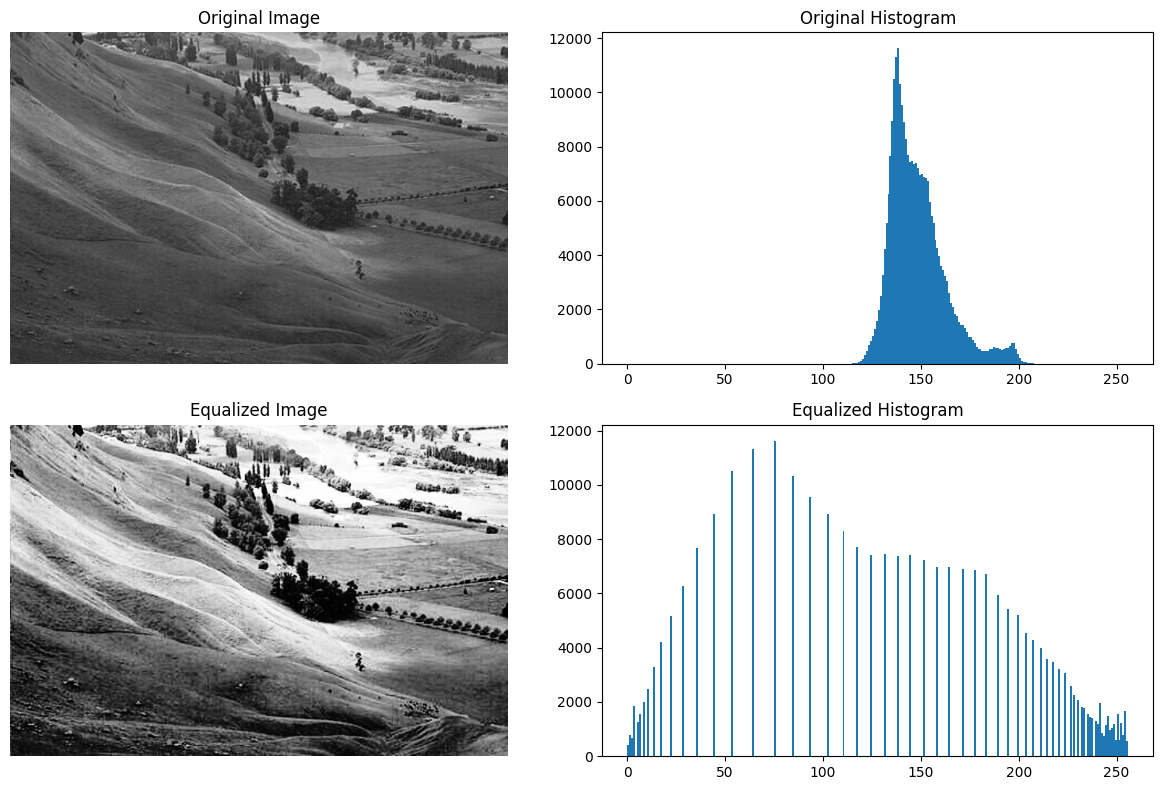

In [36]:
# Apply histogram equalization
equalized_image = cv.equalizeHist(image)

def plot_histogram(image, equalized_image):
    # Plot the original and equalized images with their histograms
    plt.figure(figsize=(12, 8))

    # Original image and its histogram
    plt.subplot(2, 2, 1)
    plt.imshow(image, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(2, 2, 2)
    plt.hist(image.ravel(), bins=256, range=[0, 256])
    plt.title('Original Histogram')

    # Equalized image and its histogram
    plt.subplot(2, 2, 3)
    plt.imshow(equalized_image, cmap='gray')
    plt.title('Equalized Image')
    plt.axis('off')

    plt.subplot(2, 2, 4)
    plt.hist(equalized_image.ravel(), bins=256, range=[0, 256])
    plt.title('Equalized Histogram')

    plt.tight_layout()
    plt.show()

# Apply histogram equalization
equalized_image = cv.equalizeHist(image)

# Plot the histograms
plot_histogram(image, equalized_image)

# Histogram Equalization from Scratch

This part include  
+ Histogram Equalization from Scratch 
+ Histogram Equalization using OpenCV 

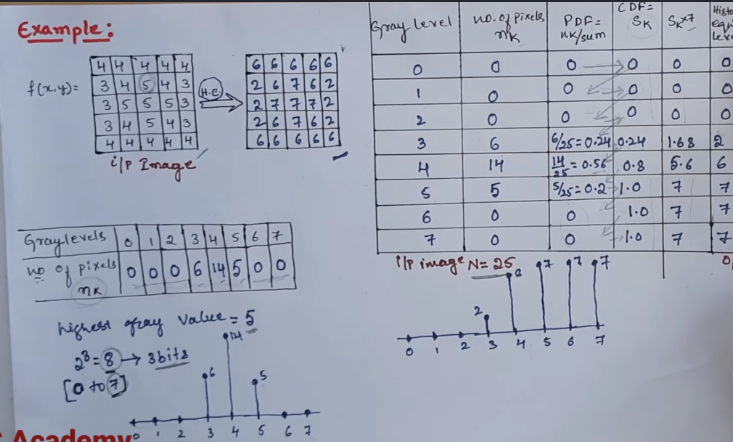
1) Get the highest gray value 5 and number of bits it take to represent 5. 
2) Initiate gray levels range = $2^{bits}$. e.g. $2^3=8$
3) Compute Histogram Equalization: 
+ **PDF:** Probability Distribution (*value_i / the total_value*)
+ **CDF:** Cumulative Distribution (*cumulative sum*) annotate as $S_{k}$
+ $S_{k} \times max(\text{gray level})$: Multiply CDF with the highest gray level 
+ **Histogram equal level:** approximate value upward (i.e. `.ceil()`  in python)
4) Replace old pixel values with new pixel values.

#### Find total Bins using  

In [37]:
def bits_require(integer):
    # Iterate through [0, 8]
    for n in range(0, 8+1): # because maximum color range is 255
        if (2**n) >= integer:
            # print(f'bits range: 2^{n}={2**n} to store {integer}')
            return 2**n         
        

In [38]:
def probability_distribution(histogram):
    total_pixels_value = sum(histogram.values())
    pdf_histogram = {key: value / total_pixels_value for key, value in histogram.items()}
    return pdf_histogram

def cumulativesum_distribution(histogram): # Sum of PDF
    cdf_histogram = {}
    cumulative_sum = 0.0
    
    for color_value, normalized_frequency in histogram.items(): # ensure color is from 0 to 255
        cumulative_sum += normalized_frequency
        cdf_histogram[color_value] = cumulative_sum
    
    return cdf_histogram

In [39]:
def replace_pixel(image, equalized_histogram):
    """
    Replace old pixel values in the image with new equalized values.

    Args:
        image (2D list or NumPy array): Grayscale image to process.
        equalized_histogram (dict): Mapping of old pixel values to new equalized values.

    Returns:
        np.ndarray: Image with updated pixel values.
    """
    
    image = np.array(image, dtype=int)
        
    # Apply the equalized histogram as a lookup table
    equalized_image = np.vectorize(equalized_histogram.get)(image)
    
    return equalized_image
    
    

In [40]:
import os 

def histogram_equalization_image(image, plot_hist=False, plot_img=False, debug=False):
    """
        Perform histogram equalization on a grayscale image histogram
        
        Args:
            histogram (dict): Input histogram, e.g., {0: 4, 1: 1, 2: 0, 3: 2, 4: 1, 5: 0}.
            bins (int): Number of bins (default is 256 to ensure 255 is included).
            plot (bool): If True then plot histograms.

        Returns:
            dict: Equalized histogram.
    """
    #? get histogram
    histogram = image_to_histogram(image)
    
    #? Get highest gray value in the image -> [0, max(image_pixel_value)]
    highest_color_value = max(histogram.keys())
    

    #? Get numbers of 2^bits represent highest_color_value 
    color_range = bits_require(highest_color_value)
    
    #? Create histogram dictionray with length == color_range 
    histogram = dict(list(histogram.items())[:color_range]) 

    #? Compute Probability Distribution Function (PDF): 
    pdf_histograms = probability_distribution(histogram)
    
    #? Compute Cumulative Distribution Function (CDF)
    cdf_histograms = cumulativesum_distribution(pdf_histograms)
    
    #? Multiply CDF with color_range
    mul_cdf_histograms = {key:value*color_range for key,value in cdf_histograms.items()}
    
    #? Rounding all histogram value
    histogram_equal_level = {key:round(value) for key, value in mul_cdf_histograms.items()}
    
    #? Call replace_pixel with the original image and the equalized histogram
    equalized_image = replace_pixel(image, histogram_equal_level)
    
    
    if plot_hist:
        plot_histogram(image, equalized_image)
        
    if debug:
        print('highest_gray_value:', highest_color_value)
        print('pdf_histograms:',pdf_histograms)
        print('cdf_histogram:',cdf_histograms )
        print('mul_cdf_histograms:',mul_cdf_histograms)
        print('histogram_equal_level:', histogram_equal_level)

            
    if plot_img:
        plt.figure(figsize=(12, 6))
        plt.subplot(1, 2, 1)
        plt.imshow(image, cmap='gray')
        plt.title('Original Image')
        
        plt.subplot(1, 2, 2)
        plt.imshow(equalized_image, cmap='gray')
        plt.title('Equalized Image')
        plt.show()

    return equalized_image, histogram_equal_level

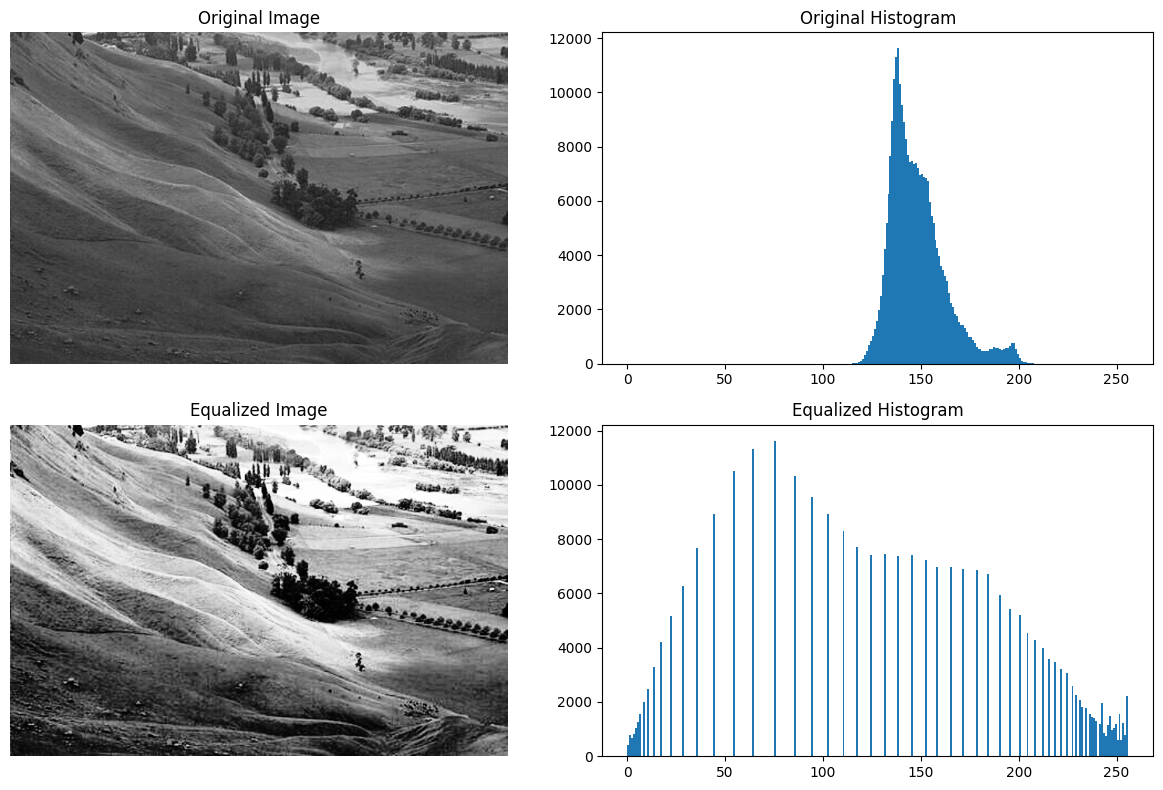

In [43]:
equalized_image, _ = histogram_equalization_image(image)
plot_histogram(image, equalized_image)